In [1]:
from surgeon_recording.reader import Reader
from glob import glob
from os.path import join
import os
import numpy as np
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go
from copy import deepcopy
import pandas as pd

In [2]:
reader = Reader()

In [11]:
data_folder = join('..', 'data') #join strings .. and data with / as separator
dir_list = ['15', '16', '17', '18', '19', '20', '21', '23'] #liste des directory (noms des fichiers)
experiment = 'chicken' # variable nom de l-exp
print(dir_list)

['15', '16', '17', '18', '19', '20', '21', '23']


In [52]:
blacklist = []
#blacklist = ['1/run2', '3/run3', '3/run5']
#blacklist = ['7/run2']
#blacklist = [join(data_folder, x) for x in blacklist]

In [53]:
specialty_keys = ["neuro", "plastic"] #variables speciality
expertise_keys = ["novice", "expert"] #variable skill level
print(specialty_keys)


['neuro', 'plastic']


In [58]:
knot_time = {} #declaration variables
tps_forces = {}
emg_data = {}
tps_data_type = 'raw'

for d in dir_list: #d prend les valeurs de dir_list a la suite
    knots_dir = [x[0] for x in os.walk(join(data_folder, d, experiment))][1:] 
    #boucle: x prend les valeurs des fichiers dans le directory ../data/d/experiment pour avoir les differents run
    #mais on obtient pour chaque fichier son path et la liste des sous fichiers puis pour chaque sous fichiers sont path et la liste des sous sous fichiers. Pour avoir path des run nous on prend que le 
    # path du fichier et des sous fichiers = la premiere valeur de la liste donc x[0]
    # on prend la liste de 1 a end car sinon on a aussi le directory d'avant en dehors des run
    
    #print(knots_dir)
    

    knots_dir.sort() #sorts elements of the knots_dir list by alphabetical order
    knot_time[d] = []
    tps_forces[d] = {}
    emg_data[d] = {}
    
    for l in ['right', 'left']:
        for f in ['index', 'middle', 'thumb']:
            key = l + '_' + f + '_' + tps_data_type #righ_index_raw, right_middle_raw... = combinaisons possibles pour les sensors
            tps_forces[d][key] = []                 #prepare un emplacement pour chaque combinaison d key {'15':{'right_index_raw': [], '...':[],.....}}
            
    #print(tps_forces)
            
    for l in ['emg' + str(x) for x in range(8)]:  #l prend les valeurs emg1, emg2, emg3, emg4....
         emg_data[d][l] = []                      #prepare un emplacement pour chaque combinaison d key {'15':{'emg1': [], '...':[],.....}}
        
    for kd in knots_dir:         #kd prend les valeurs des paths
        if not kd in blacklist:  #si le path n'est pas dans blacklist
            print(kd)
            reader.play(kd)      #utilise fonction play dans librairie reader sur le fichier kd
            time = reader.data['camera']['relative_time'].iloc[-1]    #get last row (iloc) of the relative time column of the csv file camera = donne total time
            #print(time)
            knot_time[d].append(time)      #ajoute la variable time a la liste knot_time pour chaque numero de test d
            for l in ['right', 'left']:    #l prend les valeurs right et left
                for f in ['index', 'middle', 'thumb']:         #f prend les valeurs pour repasser sur toutes les combinaisons
                    key = l + '_' + f + '_' + tps_data_type    #redefinit les key a chaque fois car on les a pas stockees
                    tps_forces[d][key].append(reader.data['tps'][key].to_numpy())   # ajoute pour chaque combinaison les data du fichier csv `tps`, de la colonne avec la key comme nom
                    #ajoute toutes les data sous forme de NumPy array
            for l in ['emg' + str(x) for x in range(8)]:       #l reprend les valeurs de emg
                emg_data[d][l].append(np.absolute(reader.data['emg'][l].to_numpy()))      #prend les valeurs aboslues dans le fichier emg, pour les colonnes nommees l, les met
                #sous forme d-array numpy et les ajoute a emg_data pour chaque test

../data/15/chicken/run1
../data/15/chicken/run3
../data/16/chicken/run1
../data/17/chicken/run1
../data/18/chicken/run1
../data/19/chicken/run1
../data/20/chicken/run1
../data/21/chicken/run1
../data/23/chicken/run1
../data/23/chicken/run2


In [59]:
subject_data = pd.read_csv(join(data_folder,"subject_data.csv"))   #reads csv of subject data and convert it as dataframe

In [64]:
subject_data

,subject,gender,strong arm,age,specialty,level,ali score,experience
0,11,M,RH,37,plastic,expert,5,NaN
1,12,F,RH,35,hand,intermediate,6,NaN
2,13,M,RH,34,neuro,intermediate,6,NaN
3,14,M,RH,32,ortho/hand,novice/intermediate,8,NaN
4,15,F,RH,34,plastic,novice,8,7.0
5,16,M,RH,32,neuro,novice,5,2.0
6,17,M,RH,50,neuro,expert,5,22.0
7,18,M,RH,38,plastic,novice,5,8.0
8,19,M,RH,31,neuro,novice,5,6.0
9,20,M,RH,33,neuro,expert,3,11.0


In [65]:
knot_time

{'15': [693.47940325737, 683.5194549560547],
 '16': [1023.4169497489929],
 '17': [960.2181010246278],
 '18': [1775.6249868869781],
 '19': [938.5969483852386],
 '20': [970.1291830539703],
 '21': [1243.4143497943878],
 '23': [1003.9434921741484, 516.6233413219452]}

# Execution time

In [66]:
for key, value in knot_time.items():              #les valeurs key et value prennent les valeurs a la suite dans knot time: key puis 1 ou 2 valeurs de temps selon les test
    print(key, np.mean(value), np.std(value))     # si plusieurs run, donne moyenne et std du temps d'execution

15 688.4994291067123 4.979974150657654
16 1023.4169497489929 0.0
17 960.2181010246278 0.0
18 1775.6249868869781 0.0
19 938.5969483852386 0.0
20 970.1291830539703 0.0
21 1243.4143497943878 0.0
23 760.2834167480469 243.66007542610163


## Differences between subjects

In [71]:
idx = 0                          # index
for subject_id1 in dir_list:     #on prend les numeros des exp (15 a 21) comme identifiant
    tmp =  dir_list[idx + 1:]
    for subject_id2 in tmp:      #prend tous les autres id a partir de 1 apres pour comparer tous les sujets entre eux
        print('diff between ' + subject_id1 + ' and ' + subject_id2)
        print(stats.ttest_ind(knot_time[subject_id1], knot_time[subject_id2]))   #t test of knot times between 2 subjects, for every possibilities
        #print(knot_time[subject_id1], knot_time[subject_id2])
        print('--------------')
    idx = idx + 1
    
    #slmt ok pour 15 et 23 car slmt la qu'on a plus d'une valeur pour les 2 sujets (?)

diff between 15 and 16
Ttest_indResult(statistic=nan, pvalue=nan)
--------------
diff between 15 and 17
Ttest_indResult(statistic=nan, pvalue=nan)
--------------
diff between 15 and 18
Ttest_indResult(statistic=nan, pvalue=nan)
--------------
diff between 15 and 19
Ttest_indResult(statistic=nan, pvalue=nan)
--------------
diff between 15 and 20
Ttest_indResult(statistic=nan, pvalue=nan)
--------------
diff between 15 and 21
Ttest_indResult(statistic=nan, pvalue=nan)
--------------
diff between 15 and 23
Ttest_indResult(statistic=-0.2945455852877984, pvalue=0.7961003089551518)
--------------
diff between 16 and 17
Ttest_indResult(statistic=nan, pvalue=nan)
--------------
diff between 16 and 18
Ttest_indResult(statistic=nan, pvalue=nan)
--------------
diff between 16 and 19
Ttest_indResult(statistic=nan, pvalue=nan)
--------------
diff between 16 and 20
Ttest_indResult(statistic=nan, pvalue=nan)
--------------
diff between 16 and 21
Ttest_indResult(statistic=nan, pvalue=nan)
------------

# TPS Data

In [76]:
average_tps_per_run = {}
for key, value in tps_forces.items():     #prend key la premieres valeur et tous les autres items vont dans value, pour toutes les lignes\key de la structure (value: ref finger et mesures)
    #print(tps_forces.items())
    average_tps_per_run[key] = {}
    for finger, values in value.items():  #pour chaque valeurs de value, on met la premiere dans finger et reste (mesures) dans values et on boucle
        average_tps_per_run[key][finger] = []
        for run in values:                #pour chque valeur dans values on boucle
            average_tps_per_run[key][finger].append(np.mean(run))     #met dans la structure la valeur moyenne des mesures, avec comme reference la key et le finger (right index raw for ex)
            
# on obtient les valeurs moyennes des mesures tps pour chaque personne et chaque doigt

In [84]:
average_tps = {}
#print(average_tps_per_run.items())
for subject, fingers in average_tps_per_run.items():          #on donne a subject la premiere valeur de la tructure (item) et a fingers la deuxieme (ref et mesures average)
    #print(fingers)
    average_tps[subject] = {}
    for finger, values in fingers.items():                    #On donne a finger la premiere valeur de la structure fingers et le reste dans values (mesures)
        average_tps[subject][finger] = {}
        average_tps[subject][finger]['mean'] = np.mean(values)   #calcul la valeur moyenne sur plusieurs run par sujet et par doigt
        average_tps[subject][finger]['std'] = np.std(values)     # pareil mais std

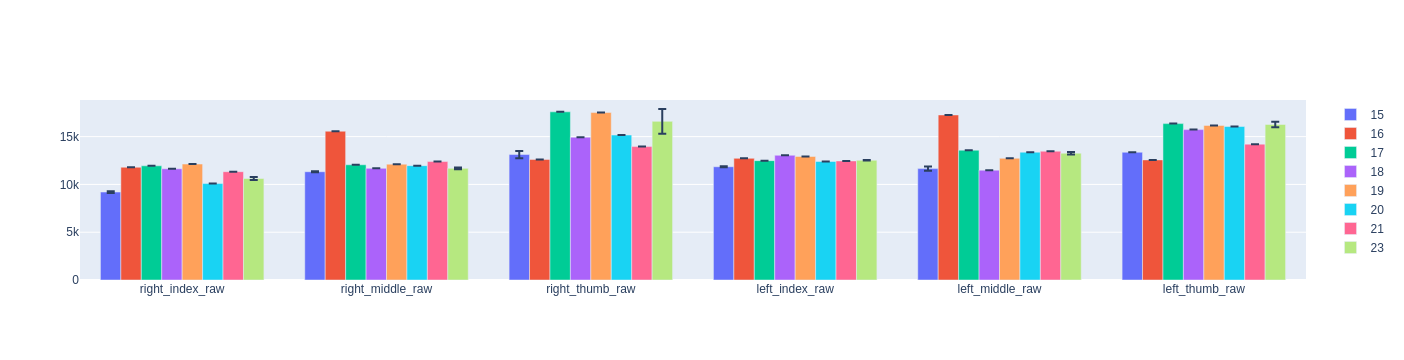

In [88]:
fig = go.Figure()
#print(average_tps.items())
for subject, fingers in average_tps.items():              # donne 1er item a subject et 2eme item dans fingers ({'ref fingers':{'mean':..... , 'std':....}, 'ref2.......})
    finger_names = list(fingers.keys())                   # fait une liste, keys donne le nom devant les : donc les ref fingers              
    finger_mean = []                                      # reinitialise variable pour chaque sujet
    finger_std = []
    for finger in finger_names:                           # variable finger prend les noms des ref fingers
        finger_mean.append(fingers[finger]['mean'])       # on ajoute a la variable finger_mean les valeurs moyennes de chaque doigt pour un sujet: fingers a une valeur de ref finger et mean et std, et on prend pour chaque valeur de doigt (finger) la valeur moyenne 'mean' de la variable fingers (qui a les ref, mean et std)
        finger_std.append(fingers[finger]['std'])         # pareil pour std
    fig.add_trace(go.Bar(
        name=subject,
        x=finger_names,
        y=finger_mean,
        error_y=dict(type='data', array=finger_std)       #on trace pour les subject 6 bars (une pour chaque doigt) avec l-erreur std
    ))
fig.update_layout(barmode='group')

### group per specialty

In [99]:
specialty_tps = {}
#print(tps_forces.items())

for s in specialty_keys:     #take values neuro or plastic
    specialty_tps[s] = {}    # declaration structure

for l in ['right', 'left']:  
    for f in ['index', 'middle', 'thumb']:
        key = l + '_' + f
        for s in specialty_keys:
            specialty_tps[s][key] = []   #structure avec 1ere dimension specialty, 2eme dimension indicateur right/left et doigt = toutes les combinaisons pour neuro et plastic
            
for key, value in tps_forces.items():    # 1ere dimension associee a key, 2eme dimension dans value (avec tous les fingers et les tables de valeurs dedans)
    specialty = subject_data.loc[subject_data["subject"] == int(key)]["specialty"].values[0]    #on selectionne la colonne specialty dans subject_data DONT la valeur dans la col subject coresp. a la key  (integer)
    #print(specialty)                     # values[0] permet avoir des string ????
    for finger, values in value.items():  # dasns chanque value on a finger qui prend la ref du finger et les values qui prennent les mesures
        f = finger.replace("_raw", "")    # enleve la mention raw des identifiants des doigts
        for run in values:                # run prend les valeurs des mesures
            specialty_tps[specialty][f] = specialty_tps[specialty][f] + run.tolist()   #on ajoute les data ensemble pour une meme specialite et un doigt = toutes les data des neuro pour le doigt du milieu ensemble

            #.tolist(): returns array of scalars

In [ ]:
average_specialty_tps = {}
for s in specialty_keys:
    average_specialty_tps[s] = {}

for l in ['right', 'left']:
    for f in ['index', 'middle', 'thumb']:
        key = l + '_' + f
        for s in specialty_keys:
            average_specialty_tps[s][key] = {}
        
for specialty, data in specialty_tps.items():
    for finger, values in data.items():
        average_specialty_tps[specialty][finger]["mean"] = np.mean(values)
        average_specialty_tps[specialty][finger]["std"] = np.std(values)

In [ ]:
fig = go.Figure()
for specialty, fingers in average_specialty_tps.items():
    finger_names = list(fingers.keys())
    finger_mean = []
    finger_std = []
    for finger in finger_names:
        finger_mean.append(fingers[finger]['mean'])
        finger_std.append(fingers[finger]['std'])
    fig.add_trace(go.Bar(
        name=specialty,
        x=finger_names,
        y=finger_mean,
        error_y=dict(type='data', array=finger_std)
    ))
fig.update_layout(barmode='group')
fig.write_image(join(data_folder, "figures", "tps_per_speciatly.svg"))

### heatmap per specialty

In [ ]:
for specialty in specialty_keys:
    x_values = []
    y_values = []
    y_min = 8000
    y_max = 16000

    fig = go.Figure()
    for i, finger in enumerate(average_specialty_tps[specialty].keys()):
        x_values.append(i)
        y_values.append(average_specialty_tps[specialty][finger]["mean"])
    y_values = (np.array(y_values) - 8000) / 8000

    fig.add_trace(go.Scatter(
        x=x_values,
        y=y_values,
        marker=dict(
            size=16,
            cmax=1,
            cmin=0,
            color=y_values,
            colorbar=dict(
                title="Colorbar"
            ),
            colorscale="rdylgn_r"
        ),
        mode="markers"))

    fig.write_image(join(data_folder, "figures", "colorscale_tps_" + specialty + ".svg"))

### group per expertise

In [ ]:
expertise_tps = {}
for e in expertise_keys:
    expertise_tps[e] = {}

for l in ['right', 'left']:
    for f in ['index', 'middle', 'thumb']:
        key = l + '_' + f
        for e in expertise_keys:
            expertise_tps[e][key] = []
            
for key, value in tps_forces.items():
    expertise = subject_data.loc[subject_data["subject"] == int(key)]["level"].values[0]
    for finger, values in value.items(): 
        f = finger.replace("_raw", "")
        for run in values:
            expertise_tps[expertise][f] = expertise_tps[expertise][f] + run.tolist()

In [ ]:
average_expertise_tps = {}
for e in expertise_keys:
    average_expertise_tps[e] = {}

for l in ['right', 'left']:
    for f in ['index', 'middle', 'thumb']:
        key = l + '_' + f
        for e in expertise_keys:
            average_expertise_tps[e][key] = {}
        
for expertise, data in expertise_tps.items():
    for finger, values in data.items():
        average_expertise_tps[expertise][finger]["mean"] = np.mean(values)
        average_expertise_tps[expertise][finger]["std"] = np.std(values)

In [ ]:
fig = go.Figure()
for expertise, fingers in average_expertise_tps.items():
    finger_names = list(fingers.keys())
    finger_mean = []
    finger_std = []
    for finger in finger_names:
        finger_mean.append(fingers[finger]['mean'])
        finger_std.append(fingers[finger]['std'])
    fig.add_trace(go.Bar(
        name=expertise,
        x=finger_names,
        y=finger_mean,
        error_y=dict(type='data', array=finger_std)
    ))
fig.update_layout(barmode='group')
fig.write_image(join(data_folder, "figures", "tps_per_expertise.svg"))

### heatmap per expertise

In [ ]:
for expertise in expertise_keys:
    x_values = []
    y_values = []
    y_min = 8000
    y_max = 16000

    fig = go.Figure()
    for i, finger in enumerate(average_expertise_tps[expertise].keys()):
        x_values.append(i)
        y_values.append(average_expertise_tps[expertise][finger]["mean"])
    y_values = (np.array(y_values) - 8000) / 8000

    fig.add_trace(go.Scatter(
        x=x_values,
        y=y_values,
        marker=dict(
            size=16,
            cmax=1,
            cmin=0,
            color=y_values,
            colorbar=dict(
                title="Colorbar"
            ),
            colorscale="rdylgn_r"
        ),
        mode="markers"))

    fig.write_image(join(data_folder, "figures", "colorscale_tps_" + expertise + ".svg"))

### group per specialty & expertise

In [ ]:
specialty_expertise_tps = {}
for s in specialty_keys:
    specialty_expertise_tps[s] = {}
    for expertise in expertise_keys:
        specialty_expertise_tps[s][expertise] = {}

for l in ['right', 'left']:
    for f in ['index', 'middle', 'thumb']:
        key = l + '_' + f
        for s in specialty_keys:
            for expertise in expertise_keys:
                specialty_expertise_tps[s][expertise][key] = []
            
for key, value in tps_forces.items():
    specialty = subject_data.loc[subject_data["subject"] == int(key)]["specialty"].values[0]
    expertise = subject_data.loc[subject_data["subject"] == int(key)]["level"].values[0]
    for finger, values in value.items(): 
        f = finger.replace("_raw", "")
        for run in values:
            specialty_expertise_tps[specialty][expertise][f] = specialty_expertise_tps[specialty][expertise][f] + run.tolist()

In [ ]:
average_specialty_expertise_tps = {}
for s in specialty_keys:
    average_specialty_expertise_tps[s] = {}
    for expertise in expertise_keys:
        average_specialty_expertise_tps[s][expertise] = {}
        average_specialty_expertise_tps[s][expertise] = {}

for l in ['right', 'left']:
    for f in ['index', 'middle', 'thumb']:
        key = l + '_' + f
        for s in specialty_keys:
            for expertise in expertise_keys:
                average_specialty_expertise_tps[s][expertise][key] = {}
        
for specialty, data in specialty_expertise_tps.items():
    for expertise, fingers in data.items():
        for finger, values in fingers.items():
            average_specialty_expertise_tps[specialty][expertise][finger]["mean"] = np.mean(values)
            average_specialty_expertise_tps[specialty][expertise][finger]["std"] = np.std(values)

In [ ]:
for specialty in specialty_keys:
    fig = go.Figure()
    for expertise, fingers in average_specialty_expertise_tps[specialty].items():
        finger_names = list(fingers.keys())
        finger_mean = []
        finger_std = []
        for finger in finger_names:
            finger_mean.append(fingers[finger]['mean'])
            finger_std.append(fingers[finger]['std'])
        fig.add_trace(go.Bar(
            name=expertise,
            x=finger_names,
            y=finger_mean,
            error_y=dict(type='data', array=finger_std)
        ))
    fig.update_layout(barmode='group')
    fig.write_image(join(data_folder, "figures", "tps_per_expertise_" + specialty + ".svg"))

### two way ANOVA

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd

In [ ]:
# create the data separating expertise and specialty for each fingers
finger_data = {}
for l in ['right', 'left']:
    for f in ['index', 'middle', 'thumb']:
        key = l + '_' + f + '_raw'
        finger_data[key] = []
    
for subject, data in average_tps.items():
    specialty = subject_data.loc[subject_data["subject"] == int(subject)]["specialty"].values[0]
    expertise = subject_data.loc[subject_data["subject"] == int(subject)]["level"].values[0]
    for finger, values in data.items():
        row = [specialty, expertise, values["mean"]]
        finger_data[finger].append(row)
                
finger_dataframes = {}
for finger, values in finger_data.items():
    finger_dataframes[finger] = pd.DataFrame(values, columns=["specialty", "expertise", "value"])

In [ ]:
finger_anova_results = {}
for finger, dataframe in finger_dataframes.items():
    #perform two-way ANOVA
    model = ols('value ~ C(specialty) + C(expertise) + C(specialty):C(expertise)', data=dataframe).fit()
    finger_anova_results[finger] = sm.stats.anova_lm(model, typ=2)

In [ ]:
finger_anova_results["right_index_raw"]

In [ ]:
finger_anova_results["left_index_raw"]

In [ ]:
finger_anova_results["right_middle_raw"]

In [ ]:
finger_anova_results["left_middle_raw"]

In [ ]:
finger_anova_results["right_thumb_raw"]

In [ ]:
finger_anova_results["left_thumb_raw"]

### t-test

In [ ]:
expertise_finger_data = {}
specialty_finger_data = {}

for l in ['right', 'left']:
    for f in ['index', 'middle', 'thumb']:
        key = l + '_' + f + '_raw'
        expertise_finger_data[key] = {}
        specialty_finger_data[key] = {}
        for specialty in specialty_keys:
            specialty_finger_data[key][specialty] = []
        for expertise in expertise_keys:
            expertise_finger_data[key][expertise] = []
        
for subject, data in average_tps_per_run.items():
    specialty = subject_data.loc[subject_data["subject"] == int(subject)]["specialty"].values[0]
    expertise = subject_data.loc[subject_data["subject"] == int(subject)]["level"].values[0]
    for finger, values in data.items():
        expertise_finger_data[finger][expertise] = expertise_finger_data[finger][expertise] + values
        specialty_finger_data[finger][specialty] = specialty_finger_data[finger][specialty] + values

In [ ]:
for f, data in expertise_finger_data.items():
    print('####### ' + f + ' ########')
    keys = list(data.keys())
    for i in range(len(keys)):
        for j in range(i + 1, len(keys)):
            print('diff between ' + keys[i] + ' and ' + keys[j])
            print(stats.ttest_ind(data[keys[i]], data[keys[j]]))
            print('--------------')

In [ ]:
for f, data in specialty_finger_data.items():
    print('####### ' + f + ' ########')
    keys = list(data.keys())
    for i in range(len(keys)):
        for j in range(i + 1, len(keys)):
            print('diff between ' + keys[i] + ' and ' + keys[j])
            print(stats.ttest_ind(data[keys[i]], data[keys[j]]))
            print('--------------')

# EMG analysis

In [ ]:
average_emg_per_run = {}
for key, value in emg_data.items():
    average_emg_per_run[key] = {}
    for channel, values in value.items():
        average_emg_per_run[key][channel] = []
        for run in values:
            mean_value = np.mean(run)
            if mean_value < 1000:
                average_emg_per_run[key][channel].append(np.mean(run))

In [ ]:
average_emg = {}
for subject, channels in average_emg_per_run.items():
    average_emg[subject] = {}
    for channel, values in channels.items():
        average_emg[subject][channel] = {}
        average_emg[subject][channel]['mean'] = np.mean(values)
        average_emg[subject][channel]['std'] = np.std(values)

In [ ]:
fig = go.Figure()
for subject, channels in average_emg.items():
    channel_names = list(channels.keys())
    channel_mean = []
    channel_std = []
    for channel in channel_names:
        channel_mean.append(channels[channel]['mean'])
        channel_std.append(channels[channel]['std'])
    fig.add_trace(go.Bar(
        name=subject,
        x=channel_names,
        y=channel_mean,
        error_y=dict(type='data', array=channel_std)
    ))
fig.update_layout(barmode='group')

### group per specialty

In [ ]:
specialty_emg = {}
for s in specialty_keys:
    specialty_emg[s] = {}

for key in ['emg' + str(x) for x in range(8)]:
    for s in specialty_keys:
        specialty_emg[s][key] = []
            
for key, value in emg_data.items():
    specialty = subject_data.loc[subject_data["subject"] == int(key)]["specialty"].values[0]
    for channel, values in value.items(): 
        for run in values:
            mean_value = np.mean(run)
            if mean_value < 1000:
                specialty_emg[specialty][channel] = specialty_emg[specialty][channel] + run.tolist()

In [ ]:
average_specialty_emg = {}
for s in specialty_keys:
    average_specialty_emg[s] = {}

for key in ['emg' + str(x) for x in range(8)]:
    for s in specialty_keys:
        average_specialty_emg[s][key] = {}
        
for specialty, data in specialty_emg.items():
    for channel, values in data.items():
        average_specialty_emg[specialty][channel]["mean"] = np.mean(values)
        average_specialty_emg[specialty][channel]["std"] = np.std(values)

In [ ]:
fig = go.Figure()
for specialty, channels in average_specialty_emg.items():
    channel_names = list(channels.keys())
    channel_mean = []
    channel_std = []
    for channel in channel_names:
        channel_mean.append(channels[channel]['mean'])
        channel_std.append(channels[channel]['std'])
    fig.add_trace(go.Bar(
        name=specialty,
        x=channel_names,
        y=channel_mean,
        error_y=dict(type='data', array=channel_std)
    ))
fig.update_layout(barmode='group')
fig.write_image(join(data_folder, "figures", "emg_per_speciatly.svg"))

### heatmap per specialty

In [ ]:
for specialty in specialty_keys:
    x_values = []
    y_values = []
    y_min = 0
    y_max = 100

    fig = go.Figure()
    for i, channel in enumerate(average_specialty_emg[specialty].keys()):
        x_values.append(i)
        y_values.append(average_specialty_emg[specialty][channel]["mean"])
    y_values = (np.array(y_values) - y_min) / (y_max - y_min)

    fig.add_trace(go.Scatter(
        x=x_values,
        y=y_values,
        marker=dict(
            size=16,
            cmax=1,
            cmin=0,
            color=y_values,
            colorbar=dict(
                title="Colorbar"
            ),
            colorscale="rdylgn_r"
        ),
        mode="markers"))

    fig.write_image(join(data_folder, "figures", "colorscale_emg_" + specialty + ".svg"))

### group per expertise

In [ ]:
expertise_emg = {}
for e in expertise_keys:
    expertise_emg[e] = {}

for key in ['emg' + str(x) for x in range(8)]:
    for e in expertise_keys:
        expertise_emg[e][key] = []
            
for key, value in emg_data.items():
    expertise = subject_data.loc[subject_data["subject"] == int(key)]["level"].values[0]
    for channel, values in value.items(): 
        for run in values:
            mean_value = np.mean(run)
            if mean_value < 1000:
                expertise_emg[expertise][channel] = expertise_emg[expertise][channel] + run.tolist()

In [ ]:
average_expertise_emg = {}
for e in expertise_keys:
    average_expertise_emg[e] = {}

for key in ['emg' + str(x) for x in range(8)]:
    for e in expertise_keys:
        average_expertise_emg[e][key] = {}
        
for expertise, data in expertise_emg.items():
    for channel, values in data.items():
        average_expertise_emg[expertise][channel]["mean"] = np.mean(values)
        average_expertise_emg[expertise][channel]["std"] = np.std(values)

In [ ]:
fig = go.Figure()
for expertise, channels in average_expertise_emg.items():
    channel_names = list(channels.keys())
    channel_mean = []
    channel_std = []
    for channel in channel_names:
        channel_mean.append(channels[channel]['mean'])
        channel_std.append(channels[channel]['std'])
    fig.add_trace(go.Bar(
        name=expertise,
        x=channel_names,
        y=channel_mean,
        error_y=dict(type='data', array=channel_std)
    ))
fig.update_layout(barmode='group')
fig.write_image(join(data_folder, "figures", "emg_per_expertise.svg"))

### heatmap per expertise

In [ ]:
for expertise in expertise_keys:
    x_values = []
    y_values = []
    y_min = 0
    y_max = 100

    fig = go.Figure()
    for i, channel in enumerate(average_expertise_emg[expertise].keys()):
        x_values.append(i)
        y_values.append(average_expertise_emg[expertise][channel]["mean"])
    y_values = (np.array(y_values) - y_min) / (y_max - y_min)

    fig.add_trace(go.Scatter(
        x=x_values,
        y=y_values,
        marker=dict(
            size=16,
            cmax=1,
            cmin=0,
            color=y_values,
            colorbar=dict(
                title="Colorbar"
            ),
            colorscale="rdylgn_r"
        ),
        mode="markers"))

    fig.write_image(join(data_folder, "figures", "colorscale_emg_" + expertise + ".svg"))

### group per expertise & specialty

In [ ]:
specialty_expertise_emg = {}
for s in specialty_keys:
    specialty_expertise_emg[s] = {}
    for expertise in expertise_keys:
        specialty_expertise_emg[s][expertise] = {}
        for key in ['emg' + str(x) for x in range(8)]:
            specialty_expertise_emg[s][expertise][key] = []
            
for key, value in emg_data.items():
    specialty = subject_data.loc[subject_data["subject"] == int(key)]["specialty"].values[0]
    expertise = subject_data.loc[subject_data["subject"] == int(key)]["level"].values[0]
    for channel, values in value.items(): 
        for run in values:
            mean_value = np.mean(run)
            if mean_value < 1000:
                specialty_expertise_emg[specialty][expertise][channel] = specialty_expertise_emg[specialty][expertise][channel] + run.tolist()

In [ ]:
average_specialty_expertise_emg = {}
for s in specialty_keys:
    average_specialty_expertise_emg[s] = {}
    for expertise in expertise_keys:
        average_specialty_expertise_emg[s][expertise] = {}
        for key in ['emg' + str(x) for x in range(8)]:
            average_specialty_expertise_emg[s][expertise][key] = {}
        
for specialty, data in specialty_expertise_emg.items():
    for expertise, channels in data.items():
        for channel, values in channels.items():
            average_specialty_expertise_emg[specialty][expertise][channel]["mean"] = np.mean(values)
            average_specialty_expertise_emg[specialty][expertise][channel]["std"] = np.std(values)

In [ ]:
for specialty in specialty_keys:
    fig = go.Figure()
    for expertise, channels in average_specialty_expertise_emg[specialty].items():
        channel_names = list(channels.keys())
        channel_mean = []
        channel_std = []
        for channel in channel_names:
            channel_mean.append(channels[channel]['mean'])
            channel_std.append(channels[channel]['std'])
        fig.add_trace(go.Bar(
            name=expertise,
            x=channel_names,
            y=channel_mean,
            error_y=dict(type='data', array=channel_std)
        ))
    fig.update_layout(barmode='group')
    fig.write_image(join(data_folder, "figures", "emg_per_expertise_" + specialty + ".svg"))

### two ways ANOVA

In [ ]:
# create the data separating expertise and specialty for each channels
channels_data = {}

for key in ['emg' + str(x) for x in range(8)]:
    channels_data[key] = []
        
for subject, data in average_emg.items():
    specialty = subject_data.loc[subject_data["subject"] == int(subject)]["specialty"].values[0]
    expertise = subject_data.loc[subject_data["subject"] == int(subject)]["level"].values[0]
    for channel, values in data.items():
        row = [specialty, expertise, values["mean"]]
        channels_data[channel].append(row)
                
channels_dataframes = {}
for channel, values in channels_data.items():
    channels_dataframes[channel] = pd.DataFrame(values, columns=["specialty", "expertise", "value"])

In [ ]:
emg_anova_results = {}
for channel, dataframe in channels_dataframes.items():
    #perform two-way ANOVA
    model = ols('value ~ C(specialty) + C(expertise) + C(specialty):C(expertise)', data=dataframe).fit()
    emg_anova_results[channel] = sm.stats.anova_lm(model, typ=2)

In [ ]:
emg_anova_results["emg0"]

In [ ]:
emg_anova_results["emg1"]

In [ ]:
emg_anova_results["emg2"]

In [ ]:
emg_anova_results["emg3"]

In [ ]:
emg_anova_results["emg4"]

In [ ]:
emg_anova_results["emg5"]

In [ ]:
emg_anova_results["emg6"]

In [ ]:
emg_anova_results["emg7"]

### t-test

In [ ]:
expertise_channel_data = {}
specialty_channel_data = {}

for key in ['emg' + str(x) for x in range(8)]:
    expertise_channel_data[key] = {}
    specialty_channel_data[key] = {}
    for specialty in specialty_keys:
        specialty_channel_data[key][specialty] = []
    for expertise in expertise_keys:
        expertise_channel_data[key][expertise] = []
        
for subject, data in average_emg_per_run.items():
    specialty = subject_data.loc[subject_data["subject"] == int(subject)]["specialty"].values[0]
    expertise = subject_data.loc[subject_data["subject"] == int(subject)]["level"].values[0]
    for channel, values in data.items():
        expertise_channel_data[channel][expertise] = expertise_channel_data[channel][expertise] + values
        specialty_channel_data[channel][specialty] = specialty_channel_data[channel][specialty] + values

In [ ]:
for f, data in expertise_channel_data.items():
    print('####### ' + f + ' ########')
    keys = list(data.keys())
    for i in range(len(keys)):
        for j in range(i + 1, len(keys)):
            print('diff between ' + keys[i] + ' and ' + keys[j])
            print(stats.ttest_ind(data[keys[i]], data[keys[j]]))
            print('--------------')

In [ ]:
for f, data in specialty_channel_data.items():
    print('####### ' + f + ' ########')
    keys = list(data.keys())
    for i in range(len(keys)):
        for j in range(i + 1, len(keys)):
            print('diff between ' + keys[i] + ' and ' + keys[j])
            print(stats.ttest_ind(data[keys[i]], data[keys[j]]))
            print('--------------')